## School Enrollment Metric - Sophia Kadegnon 
Oddly enough, we discovered that majority of Pokemon Go players are adults. With that in mind, we decided to factor in the  number of children in an area as a criteria. In order to do so, we used school enrollment data by neighborhood to determine which neighborhood had the lowest number of children. The lower the amount of children, the better in this metric.

To start, we read through the dataset and created a dataframe. 

In [2]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas 

data = pd.read_csv("https://data.wprdc.org/dataset/27b6eef7-8825-4cc4-8b48-52c17ac80d37/resource/7b0660d1-c812-496d-ab0a-8560902e9e70/download/neighborhood_school_enrollment.csv")
pd.DataFrame(data)

,neighborhood,school,enrolled_students
0,Allegheny Center,Other,50
1,Allegheny Center,PITTSBURGH KING PreK-8,34
2,Allentown,Other,96
3,Allentown,PITTSBURGH GRANDVIEW PreK-5,76
4,Allentown,PITTSBURGH SOUTH HILLS 6-8,50
...,...,...,...
501,Wilkinsburg Borough,Other,72
502,Windgap,Other,50
503,Windgap,PITTSBURGH WESTWOOD K-5,29
504,Windgap,PITTSBURGH BRASHEAR HIGH SCHOOL,19


We noticed that this dataset includes multiple schools within the same neighborhood. We wanted to condense the data in order to only show one row per neighborhood and have the total number of children per neighborhood be shown as the final value. In order to simplify the data, we made a dictionary in order to condense the information. 

In [3]:
#make dictionary
kids_dict = dict()

#read through and add to dictionary
for row in range(len(data)):
    #get the neighborhood name
    name = data.loc[row, 'neighborhood']
    
    #if it's already in the dictionary:
    if name in kids_dict:
        kids_dict[name] += data.loc[row, 'enrolled_students']
    #if not set it equal to the value
    else:
        kids_dict[name] = data.loc[row, 'enrolled_students']

#make it a series for sorting
num_kids_series = pd.Series(kids_dict, name = 'neighborhood')

#print
num_kids_series.sort_values()[:]

North Oakland            11
Central Oakland          16
Golden Triangle          18
Ridgemont                20
Saint Clair              25
                       ... 
Squirrel Hill South     679
Sheraden                694
Beechview               794
Brookline              1169
Carrick                1276
Name: neighborhood, Length: 87, dtype: int64

Condensing the data made it a lot easier to work with. But even in this state, there were still many rows that were significantly outside the range we were going for.

To narrow down the results, the top ten neighborhoods with the least amount of students is plotted.

Text(0, 0.5, 'Number of students')

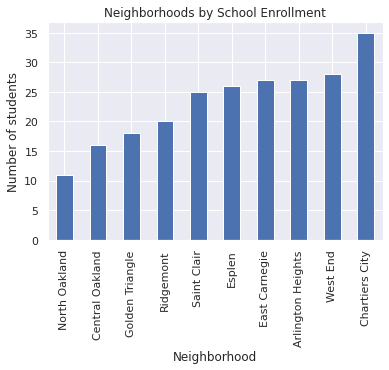

In [4]:
sns.set()
num_kids_series.sort_values()[:10].plot.bar()
plt.title('Neighborhoods by School Enrollment')
plt.xlabel('Neighborhood')
plt.ylabel('Number of students')

Alas, we can start to see some neighborhoods separate themselves from the rest of the pack. But just to make sure, I created a pie chart with the top 5 nieghborhoods. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f84bc4a8d30>],
      dtype=object)

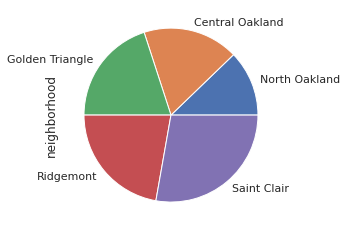

In [5]:
num_kids_series.sort_values()[:5].plot.pie(subplots=True)


# Sophia's Conclusion 

North Oakland won the gold in a close competition for best neighborhood to play Pokemon Go in according to my metric. North Oakland only has 11 children enrolled in school. Considering that Oakland itself is primarially a college town, this makes  a lot of sense. Specifically, North Oakland is home to half of the University of Pittsburgh's halls and academic buildings. Not many children to be found. I'm not from the Pittsburgh area but I'm not surprised that Ridgemont won the overall competition. With its small population and primarily residential feel, it would make a good area to play Pokemon Go. Honestly speaking, I've never played Pokemon Go so I'm not exactly sure what constitutes a good neighborhood to play, but I'll take our project's word for it. If I had to choose, I would assume Central Oakland would be the best neighborhood in Pittsburgh to Play Pokemon go but maybe I'm biased because it's the only neighborhood I'm familiar with. 